# Case 1: Dropping an egg in boiling water

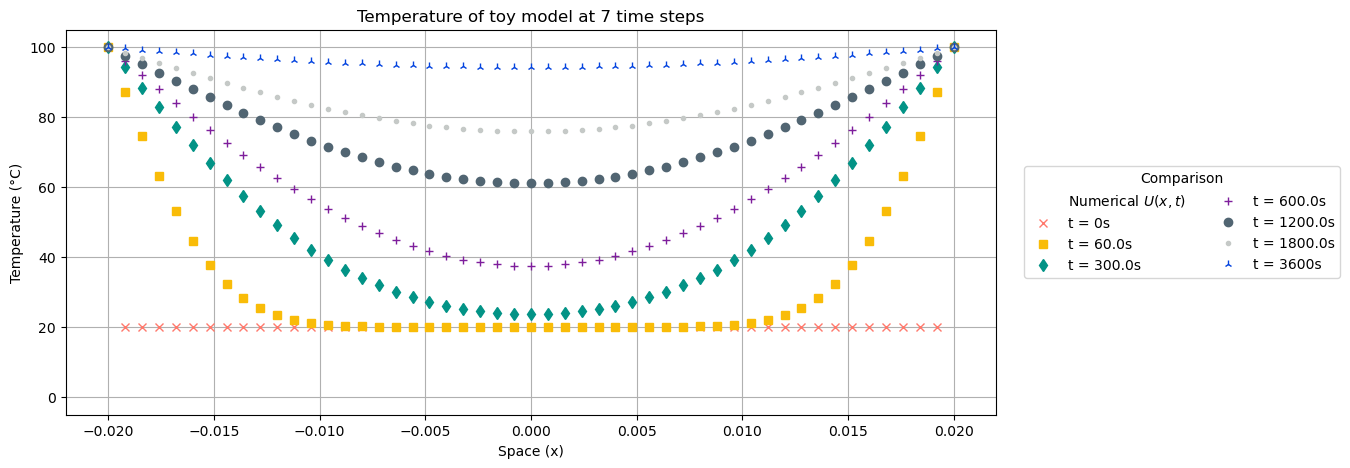

In [5]:
# Baseline packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from scipy.sparse        import diags_array
from scipy.sparse.linalg import spsolve
%matplotlib inline

# Physical parameters
alpha = 1.3e-7        # thermal diffusivity (m^2/s)
L = 0.04              # domain length, egg diameter = 4 cm
T_d = [100.0,100.0]   # boiling water on edges 
T_0=20.0              # Room temp


#Heating water up
#Linear process
#depends on mass,m heat capacity, c and power p
def Water_temp(t,mass = 1, c = 4186, power =1000):
    Temp_t = T_0 + power/(mass*c)*t
    if Temp_t>=100.0:
        Temp_t = 100.0
    return [Temp_t,Temp_t]
    
# Initial conditions
def I_egg(x):
    ''' Computes the initial condition of 20deg'''
    i_x = T_0 * np.ones_like(x) # note that ones_like produces a vector of 1's the same size as its argument
    return i_x
    
Nx = 101               # number of spatial points
x = np.linspace(-L/2, L/2, Nx)  # spatial domain
dx = x[1] - x[0]


# Time parameters
t_max = 3600.0 
Nt = 3601
t = np.linspace(0.0,t_max,Nt)
dt = t[1] - t[0]

C = dt*alpha/(dx**2)

# Initialise U
U = np.zeros((Nt,Nx))
U[0] = I_egg(x)
# Enforce boundary conditions for all space points
U[:,[0,-1]] = T_d

# Backwards Euler matrix
# Values on the three non-zero diagonals
diags = np.ones((3,Nx))
# Add 2C to main diagonal except at the endpoints (first index = 0 represents the main diagonal here)
diags[0,1:-1] += 2 * C             
diags[1:] = - C;    
diags[1,0] = 0.0
diags[2,-2] = 0.0 
# Create the matrix, taking care of the order in which we defined the diagonals
A = diags_array(diags, offsets = (0,1,-1), shape = (Nx, Nx), format = 'csr')

center = []
cent_i = 50
## Iterate
for n in range(0, Nt - 1):
    center.append(U[n,cent_i])
    U[n+1] = spsolve(A, U[n])

def plotting(U,x,t):
    # Set some markers and colours to make comparison easy
    markers = ['x','s','d','+','o','.','2']
    colours = ['xkcd:salmon','xkcd:golden rod','xkcd:teal','xkcd:purple','xkcd:slate','xkcd:silver','xkcd:blue']    
    
    # display times
    disp_times = [0, 60, 300, 600, 1200, 1800, 3600]

    # Set up the figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))

    # # Dummy plot for legend titles
    # # ax.scatter([0], [0], color='white', label=r'Exact $u(x,t)$', lw=0)

    # # Plot actual curves
    # for i, idx_t in enumerate(disp_times):
    #     label = 't = {0:.0e}'.format(t[idx_t]) if (0 < t[idx_t] < t_max) else 't = {0:.0f}'.format(t[idx_t])
    #     ax.plot(x, exact_handle(x,t[idx_t]), color = colours[i], label = label)

    ax.scatter([0], [0], color='white', label=r'Numerical $U(x,t)$', lw=0)
        
    for i, idx_t in enumerate(disp_times):
        label = 't = {0}s'.format(t[idx_t]) if (0 < t[idx_t] < t_max) else 't = {0:.0f}s'.format(t[idx_t])
        ax.plot(x[::2], U[idx_t][::2], linestyle = '', marker = markers[i], color = colours[i], label = label )

    ax.legend(ncols = 2, loc = 'center',  bbox_to_anchor=(1.2, 0.5), title ='Comparison')
    #ax.set_xlim(0-1e-2,1.0+1e-2)    # zoom in on area of interest with a bit of leeway each end
    plt.xlabel("Space (x)")
    plt.ylabel("Temperature (°C)")  
    plt.title("Temperature of toy model at 7 time steps")
    plt.grid(True)
    plt.show()


plotting(U,x,t)

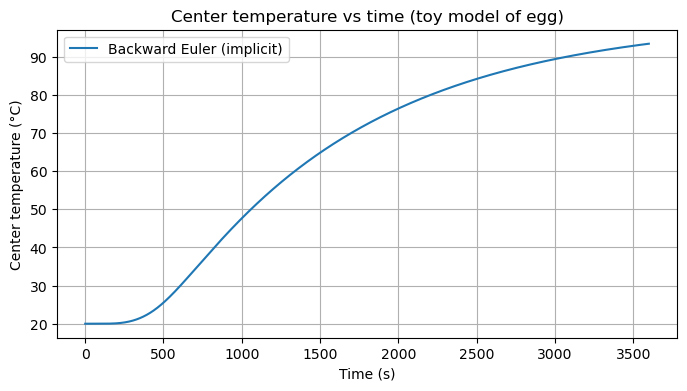

In [13]:
# Center temperature vs time
t_imp = np.linspace(0, t_max, len(center))
plt.figure(figsize=(8,4))
plt.plot(t_imp, center, label="Backward Euler (implicit)")
plt.xlabel("Time (s)")
plt.ylabel("Center temperature (°C)")
plt.title("Center temperature vs time (toy model of egg)")
plt.legend()
plt.grid(True)
plt.show()

# Case 2: Heating water from room temp

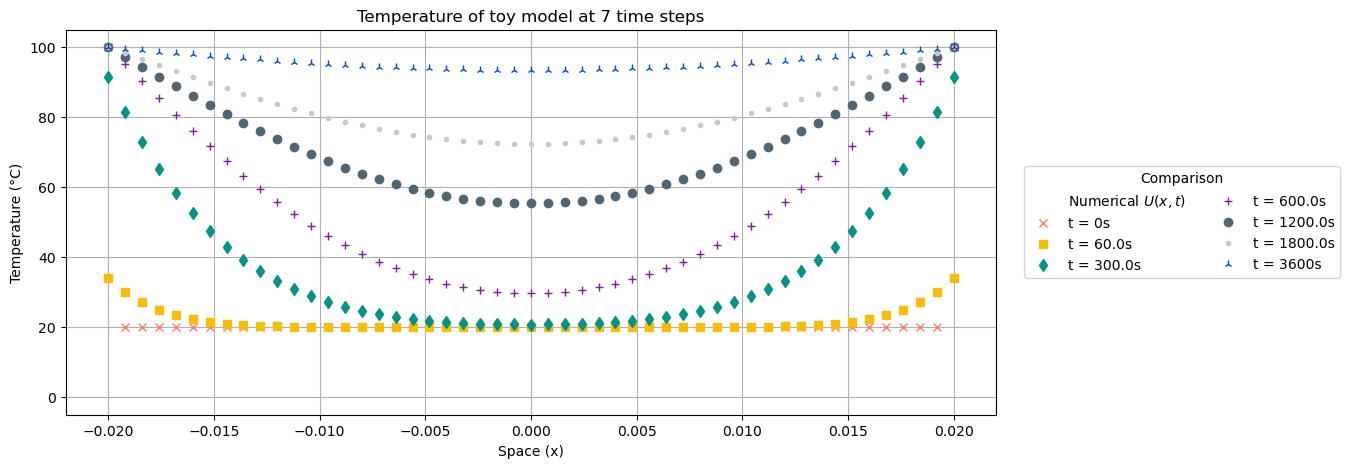

In [10]:
# Initialise U
U = np.zeros((Nt,Nx))
U[0] = I_egg(x)
# Enforce boundary conditions for all space points
U[:,[0,-1]] = T_d

center = []
cent_i = 50
## Iterate
for n in range(0, Nt - 1):
    center.append(U[n,cent_i])
    U[n+1] = spsolve(A, U[n])
    U[n+1,[0,-1]] = Water_temp(n)

plotting(U,x,t)

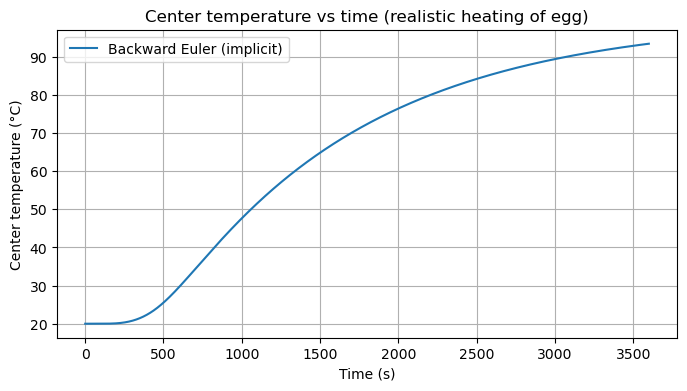

In [12]:
# Center temperature vs time
t_imp = np.linspace(0, t_max, len(center))
plt.figure(figsize=(8,4))
plt.plot(t_imp, center, label="Backward Euler (implicit)")
plt.xlabel("Time (s)")
plt.ylabel("Center temperature (°C)")
plt.title("Center temperature vs time (realistic heating of egg)")
plt.legend()
plt.grid(True)
plt.show()